In [1]:
import csv
import glob
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as tick
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib.cm import ScalarMappable
from matplotlib import rcParams
import matplotlib.cm as cm

results_path = ".\..\data"

In [2]:
# Get the data
df = pd.read_csv(results_path + "\par_temp_comp.csv", delimiter=",", engine='python')
df

,X,Y,Temp_Num,Temp_Exact
0,0.0,0.00000,0.0,0.0
1,0.0,0.15625,0.0,0.0
2,0.0,0.31250,0.0,0.0
3,0.0,0.46875,0.0,0.0
4,0.0,0.62500,0.0,0.0
...,...,...,...,...
16636,20.0,19.37500,0.0,0.0
16637,20.0,19.53125,0.0,0.0
16638,20.0,19.68750,0.0,0.0
16639,20.0,19.84375,0.0,0.0


In [3]:
Z = df.pivot_table(index='X', columns='Y', values='Temp_Exact').T.values

X_unique = np.sort(df.X.unique())
Y_unique = np.sort(df.Y.unique())
X, Y = np.meshgrid(X_unique, Y_unique)

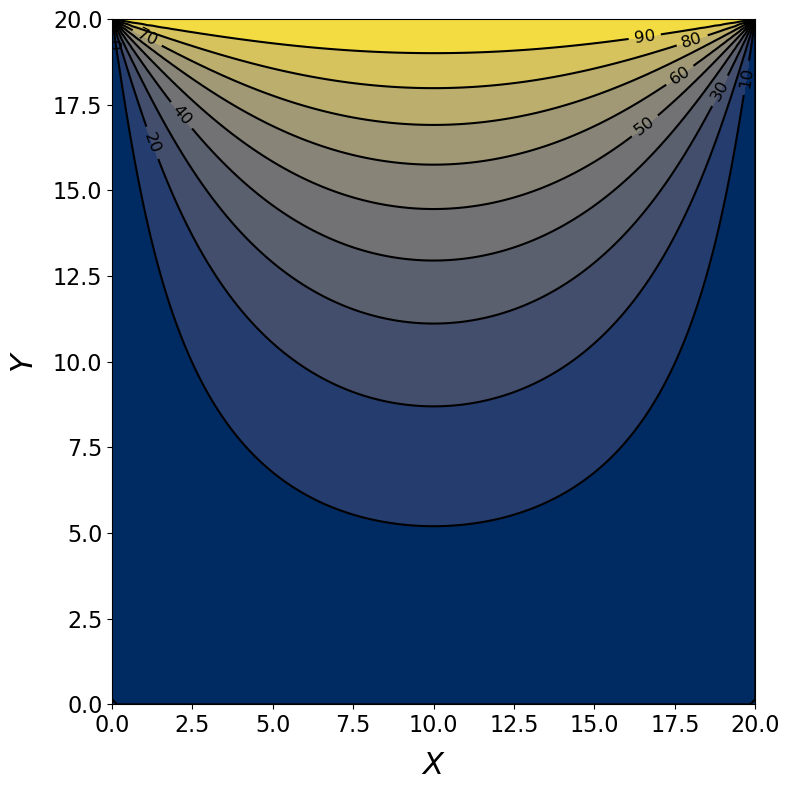

In [4]:
rcParams['figure.figsize'] = 8, 8 # sets plot size
fig = plt.figure()
ax = fig.add_subplot(111)

cpf = ax.contourf(X, Y, Z, 10, cmap=cm.cividis)

# Set all level lines to black
line_colors = ['black' for l in cpf.levels]

# Make plot and customize axes
cp = ax.contour(X, Y, Z, 10, colors=line_colors)
ax.clabel(cp, fontsize=12, colors=line_colors)

ax.set_xlim(0, 20)
ax.set_ylim(0, 20)

ax.set_xlabel('$X$')
_ = ax.set_ylabel('$Y$')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel("$X$", fontsize=22, labelpad=10)
plt.ylabel("$Y$", fontsize=22, labelpad=10)

fig.tight_layout()
#fig.savefig(r".\..\figures\numerical_temp.png", facecolor='w', dpi=600)

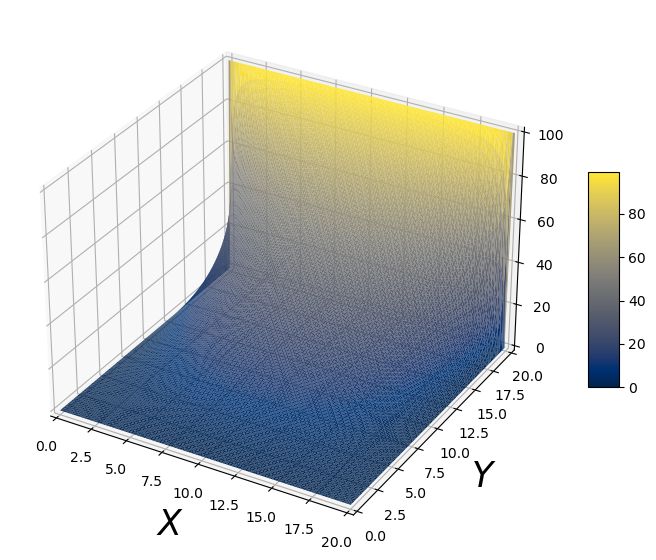

In [5]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_trisurf(df['X'], df['Y'], df['Temp_Num'], cmap=plt.cm.cividis, linewidth=0.2)

plt.xlabel("$X$", fontsize=25, labelpad=10)
plt.ylabel("$Y$", fontsize=25, labelpad=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

ax.set_xlim(0, 20)
ax.set_ylim(0, 20)

fig.colorbar(surf, shrink=0.4, aspect=7)

#fig.savefig(r".\..\figures\numerical-temp-surf.png", facecolor='w', dpi=600)
plt.show()

In [6]:
Z_num = df.pivot_table(index='X', columns='Y', values='Temp_Num').T.values
Z_an = df.pivot_table(index='X', columns='Y', values='Temp_Exact').T.values

X_unique = np.sort(df.X.unique())
Y_unique = np.sort(df.Y.unique())
X, Y = np.meshgrid(X_unique, Y_unique)

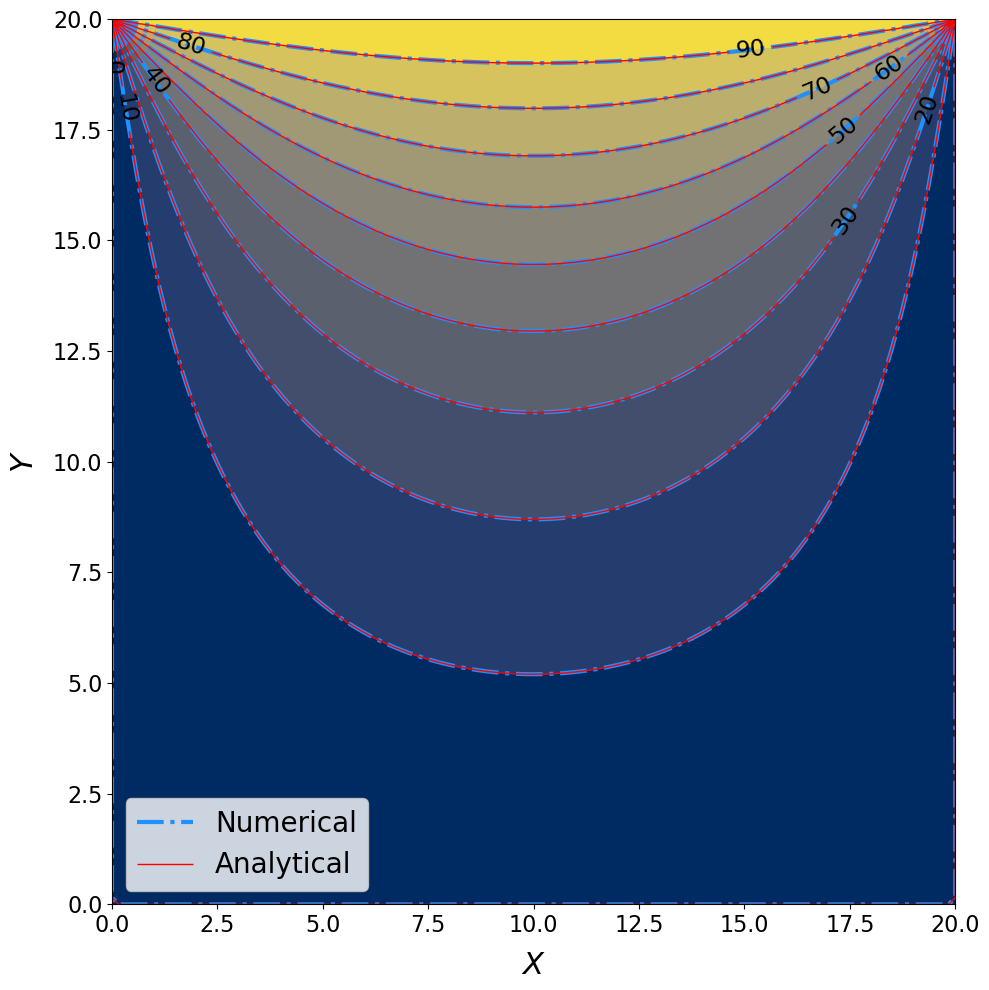

In [7]:
rcParams['figure.figsize'] = 10, 10 # sets plot size
fig = plt.figure()
ax = fig.add_subplot(111)

cp_num = ax.contourf(X, Y, Z_num, 10, cmap=cm.cividis)
cp_an = ax.contourf(X, Y, Z_an, 10, cmap=cm.cividis)

# Set all level lines to black
line_colors_num = ['dodgerblue' for l in cp_num.levels]
line_colors_an = ['red' for l in cp_an.levels]

# Make plot and customize axes
cp_num = ax.contour(X, Y, Z_num, 10, colors=line_colors_num, linestyles='dashdot', linewidths=3)
cp_an = ax.contour(X, Y, Z_an, 10, colors=line_colors_an, linewidths=1)

ax.clabel(cp_an, fontsize=17, colors='black')

ax.set_xlim(0, 20)
ax.set_ylim(0, 20)

ax.set_xlabel('$X$')
_ = ax.set_ylabel('$Y$')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel("$X$", fontsize=22, labelpad=10)
plt.ylabel("$Y$", fontsize=22, labelpad=10)

h1,l1 = cp_num.legend_elements()
h2,l1 = cp_an.legend_elements()

plt.legend([h1[0], h2[0]], ['Numerical', 'Analytical'], loc='lower left', prop={'size': 20})
fig.tight_layout()

#fig.savefig(r".\..\figures\comparison_temp.png", facecolor='w', dpi=600)

In [8]:
# Get the data
df_x = pd.read_csv(results_path + r"\temp-line\par_temp_line_1x.csv", delimiter=",", engine='python')
df_y = pd.read_csv(results_path + r"\temp-line\par_temp_line_1y.csv", delimiter=",", engine='python')

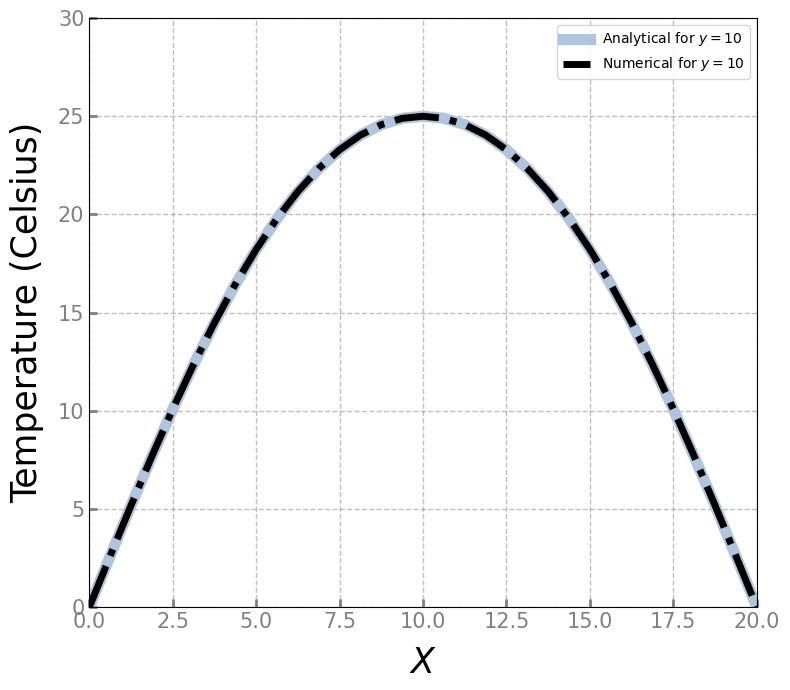

In [9]:
# for time = 0.1
fig = plt.figure(figsize=(8,7))

ax1 = plt.plot(df_x['X'], df_x['Temp_Exact'], label='Analytical for $y=10$', color="lightsteelblue", linewidth=8, linestyle='solid')
ax2 = plt.plot(df_x['X'], df_x['Temp_Num'], label='Numerical for $y=10$', color="black", linewidth=5, linestyle='dashdot')

plt.legend()

plt.xlabel("$X$", fontsize=25, labelpad=10)
plt.ylabel("Temperature (Celsius)", fontsize=25, labelpad=10)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tick_params(direction='in', length=6, width=2, colors='grey',
               grid_color='grey', grid_alpha=0.5)

plt.xlim([0, 20])
plt.ylim([0,30])

fig.tight_layout()
plt.rc('legend',fontsize=15)
plt.grid(color = 'grey', linestyle = '--', linewidth = 1)

#fig.savefig(r".\..\figures\line-temp-x.png", facecolor='w', dpi=600)
plt.show()

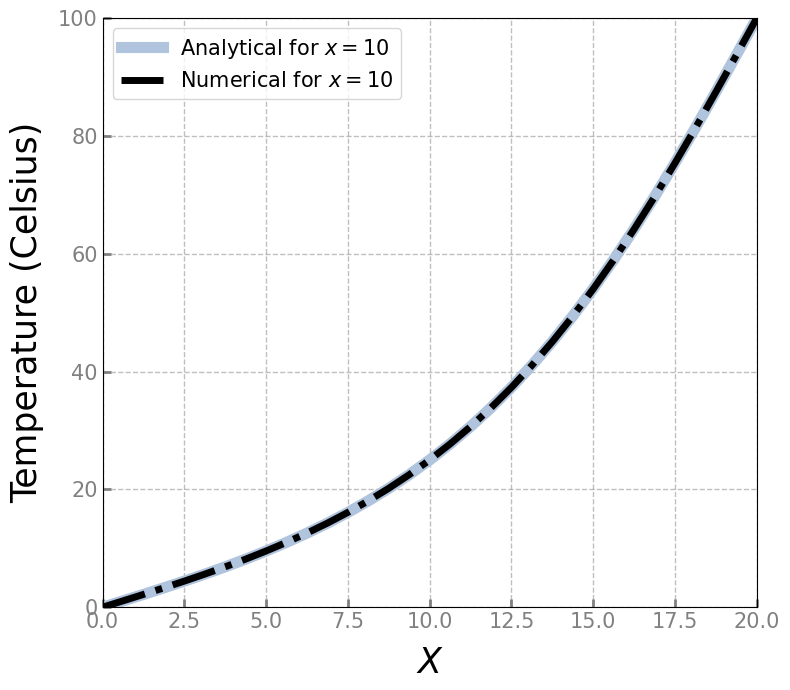

In [10]:
# for time = 0.1
fig = plt.figure(figsize=(8,7))

ax1 = plt.plot(df_y['Y'], df_y['Temp_Exact'], label='Analytical for $x=10$', color="lightsteelblue", linewidth=8, linestyle='solid')
ax2 = plt.plot(df_y['Y'], df_y['Temp_Num'], label='Numerical for $x=10$', color="black", linewidth=5, linestyle='dashdot')

plt.legend()

plt.xlabel("$X$", fontsize=25, labelpad=10)
plt.ylabel("Temperature (Celsius)", fontsize=25, labelpad=10)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tick_params(direction='in', length=6, width=2, colors='grey',
               grid_color='grey', grid_alpha=0.5)

plt.xlim([0, 20])
plt.ylim([0,100])

fig.tight_layout()
plt.rc('legend', fontsize=15, loc='upper left')
plt.grid(color = 'grey', linestyle = '--', linewidth = 1)

#fig.savefig(r".\..\figures\line-temp-y.png", facecolor='w', dpi=600)
plt.show()

In [11]:
# Get the data
df_strong = pd.read_csv(results_path + r"\timings\strong.csv", delimiter=",", engine='python')
df_weak = pd.read_csv(results_path + r"\timings\weak.csv", delimiter=",", engine='python')

df_strong_64 = df_strong.iloc[:6,:]
df_strong_128= df_strong.iloc[6:12,:]
df_strong_256 = df_strong.iloc[12:, :]

df_weak

,size,n_procs,time
0,16,1,0.852361
1,32,2,11.592872
2,64,4,10.897845
3,128,8,828.266770
4,160,10,1575.177918
5,192,12,3971.397972


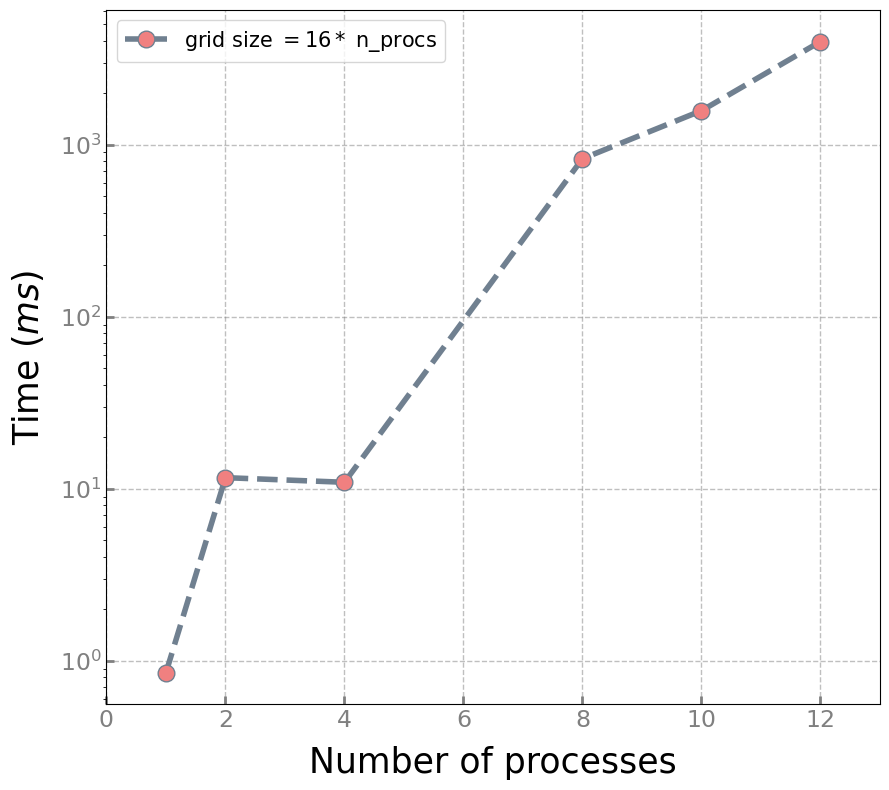

In [12]:
# weak scaling time plot
fig = plt.figure(figsize=(9,8))

ax1 = plt.plot(df_weak['n_procs'], df_weak['time'], label='grid size $= 16 *$ n_procs', color="slategray", 
               linewidth=4, linestyle='dashed', marker='o', markersize=12, markerfacecolor='lightcoral')

plt.legend()

plt.xlabel("Number of processes", fontsize=25, labelpad=10)
plt.ylabel("Time ($ms$)", fontsize=25, labelpad=10)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

plt.tick_params(direction='in', length=6, width=2, colors='grey',
               grid_color='grey', grid_alpha=0.5)

plt.xlim([0, 13])

plt.yscale("log")
plt.rc('legend',fontsize=20, loc='upper left',fancybox=True, edgecolor='black', framealpha=1, shadow=True, borderpad=0.5)

fig.tight_layout()
plt.grid(color = 'grey', linestyle = '--', linewidth = 1)

#fig.savefig(r".\..\figures\weak-scaling.png", facecolor='w', dpi=600)
plt.show()

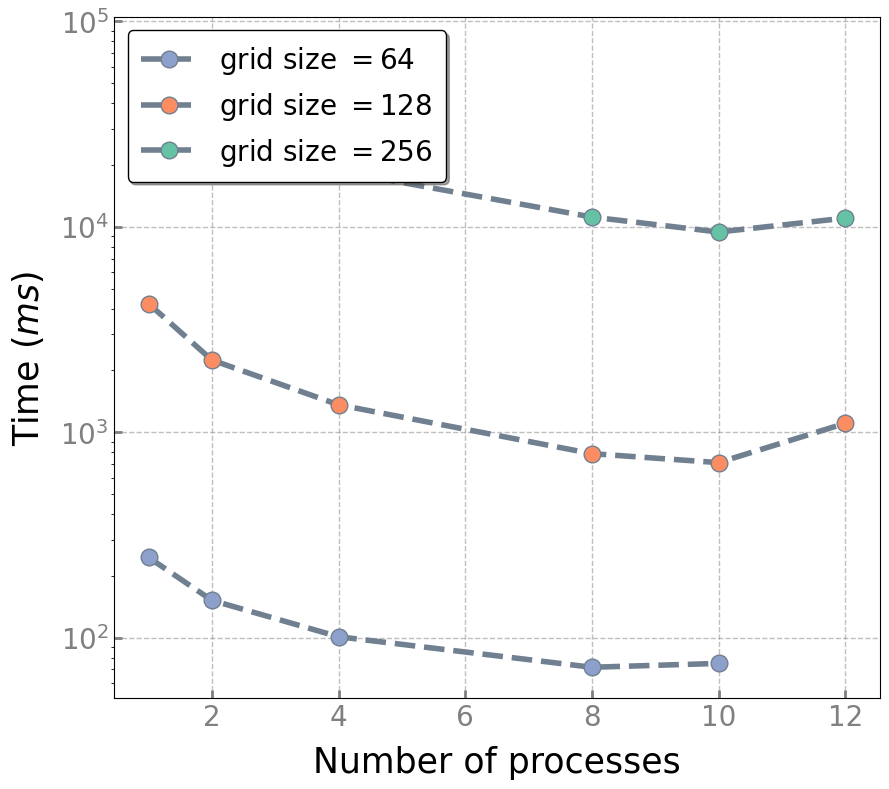

In [13]:
# strong scaling plot
fig = plt.figure(figsize=(9,8))

ax1 = plt.plot(df_strong_64['n_procs'], df_strong_64['time'], label='grid size $= 64$', color="slategray", 
               linewidth=4, linestyle='dashed', marker='o', markersize=12, markerfacecolor='#8da0cb')

ax2 = plt.plot(df_strong_128['n_procs'], df_strong_128['time'], label='grid size $= 128$', color="slategray", 
               linewidth=4, linestyle='dashed', marker='o', markersize=12, markerfacecolor='#fc8d62')

ax3 = plt.plot(df_strong_256['n_procs'], df_strong_256['time'], label='grid size $= 256$', color="slategray", 
               linewidth=4, linestyle='dashed', marker='o', markersize=12, markerfacecolor='#66c2a5')

plt.yscale("log")

plt.legend()
plt.rc('legend',fontsize=20, loc='best',fancybox=True, edgecolor='black', framealpha=1, shadow=True, borderpad=0.5)

plt.xlabel("Number of processes", fontsize=25, labelpad=10)
plt.ylabel("Time ($ms$)", fontsize=25, labelpad=10)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tick_params(direction='in', length=6, width=2, colors='grey',
               grid_color='grey', grid_alpha=0.5)

fig.tight_layout()
plt.rc('legend',fontsize=15, loc='upper right')
plt.grid(color = 'grey', linestyle = '--', linewidth = 1)

#fig.savefig(r".\..\figures\strong-scaling_time.png", facecolor='w', dpi=600)

plt.show()